In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import matplotlib as mpl
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
import pickle
import matplotlib.ticker as mtick
import math
from itertools import combinations
import random
from sklearn.linear_model import LinearRegression
from qgrid import show_grid
from adjustText import adjust_text

In [104]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 4
plt.rcParams['axes.linewidth'] = 0.25
plt.rcParams['figure.figsize'] = (3, 2)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.linewidth'] = 0.25

In [105]:
sns.set(style="ticks", context="paper", font_scale=1, font="Arial")
sns.set_context("paper",
                rc={
                    "axes.linewidth": 0.25,
                    'xtick.major.size': 2,
                    'xtick.major.width': 0.25,
                    'ytick.major.size': 2,
                    'ytick.major.width': 0.25,
                    'xtick.labelsize': 6,
                    'ytick.labelsize': 6,
                    'axes.labelsize': 7
                })

In [106]:
# metrics = ['r2', 'corr', 'mae', 'rmse']
metrics = ['r2', 'corr', 'mae']

In [107]:
model_palette = {
    'DeePathNet': '#4c72b0',
    'random forest': '#dd8452',
    'elastic net': '#55a868',
    'PCA': '#c44e52',
    'moCluster': '#8172b3',
    'mixOmics': '#937860'
}

In [108]:
print(sns.color_palette().as_hex())


['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


# Sanger GDSC

## group by run

In [109]:
en_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_en/mutation_cnv_rna/scores_202107110149_ec_en_lrp_drug_mutation_cnv_rna.csv"
).groupby(['run']).median()
en_mutation_cnv_rna['model'] = 'elastic net'

In [134]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_rf/mutation_cnv_rna/scores_202107101239_ec_rf_lrp_drug_mutation_cnv_rna.csv"
).groupby(['run']).median()
rf_mutation_cnv_rna['model'] = 'random forest'

In [135]:
mixomics_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/mixOmics/sanger_mutation_cnv_rna_gdsc_50_comp.csv"
).groupby(['run']).median()
mixomics_mutation_cnv_rna[
    'model'] = 'mixOmics'

In [136]:
pca_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/pca_rf/mutation_cnv_rna/scores_202107121818_pca_rf_lrp_drug_mutation_cnv_rna.csv"
).groupby(['run']).median()
pca_mutation_cnv_rna[
    'model'] = 'PCA'

In [137]:
moCluster_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/moCluster_rf/mutation_cnv_rna/scores_202107121932_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
).groupby(['run']).median()
moCluster_mutation_cnv_rna['model'] = 'moCluster'

In [138]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/DeepMultiOmicNet/mutation_cnv_rna/scores_202107081045_DOIT_LRP.csv.gz"
)

dl_list = [dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).max()['corr'].reset_index().groupby('run').median(),
           dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).max()['r2'].reset_index().groupby('run').median(),
           dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).min()['mae'].reset_index().groupby('run').median(),
           dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).min()['rmse'].reset_index().groupby('run').median()]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [139]:
cols = ['corr', 'r2', 'mae', 'rmse', 'model']

In [140]:
commbined_df = pd.concat([
    dl_merged[cols],  rf_mutation_cnv_rna[cols], en_mutation_cnv_rna[cols],
    pca_mutation_cnv_rna[cols], moCluster_mutation_cnv_rna[cols]
])

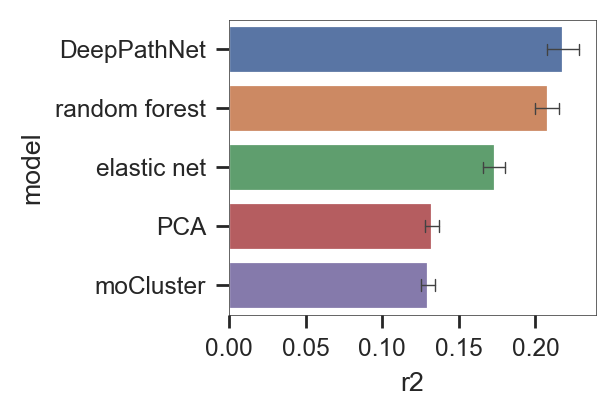

In [143]:
g = sns.barplot(x='r2',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_r2_run.pdf", dpi=500)

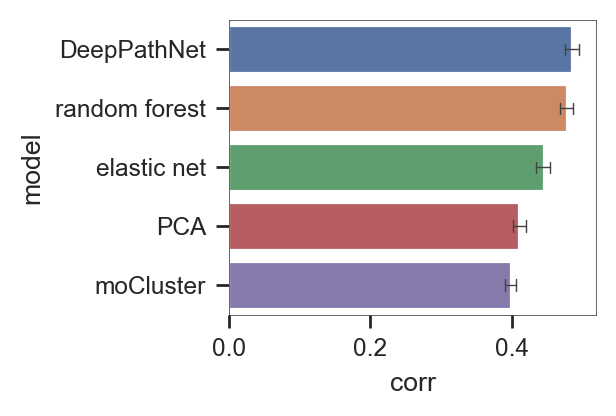

In [144]:
sns.barplot(x='corr',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_corr_run.pdf", dpi=500)

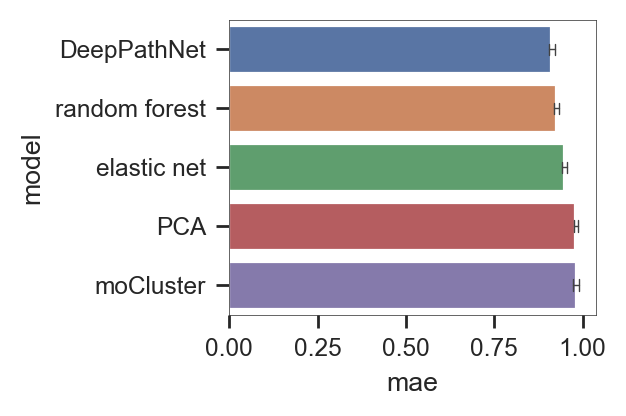

In [145]:
sns.barplot(x='mae',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_mae_run.pdf", dpi=500)

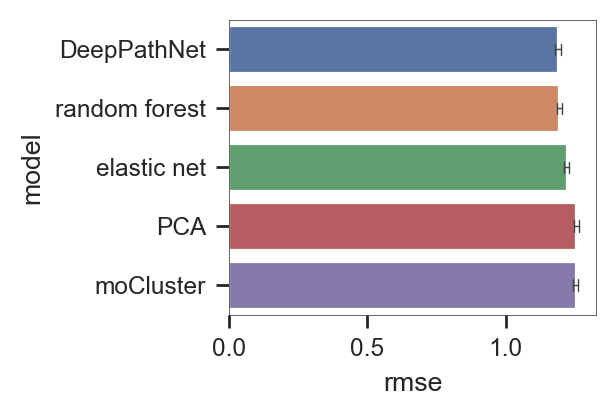

In [146]:
sns.barplot(x='rmse',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_rmse_run.pdf", dpi=500)

## group by drug

In [155]:
en_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_en/mutation_cnv_rna/scores_202107110149_ec_en_lrp_drug_mutation_cnv_rna.csv"
).groupby(['drug_id']).mean()
en_mutation_cnv_rna['model'] = 'elastic net'

In [156]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_rf/mutation_cnv_rna/scores_202107101239_ec_rf_lrp_drug_mutation_cnv_rna.csv"
).groupby(['drug_id']).mean()
rf_mutation_cnv_rna['model'] = 'random forest'

In [157]:
mixomics_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/mixOmics/sanger_mutation_cnv_rna_gdsc_50_comp.csv"
).groupby(['drug_id']).mean()
mixomics_mutation_cnv_rna[
    'model'] = 'mixOmics'

In [158]:
pca_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/pca_rf/mutation_cnv_rna/scores_202107121818_pca_rf_lrp_drug_mutation_cnv_rna.csv"
).groupby(['drug_id']).mean()
pca_mutation_cnv_rna[
    'model'] = 'PCA'

In [159]:
moCluster_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/moCluster_rf/mutation_cnv_rna/scores_202107121932_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
).groupby(['drug_id']).median()
moCluster_mutation_cnv_rna['model'] = 'moCluster'

In [160]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/DeepMultiOmicNet/mutation_cnv_rna/scores_202107081045_DOIT_LRP.csv.gz"
)

dl_list = [dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).max()['corr'].reset_index().groupby('drug_id').mean(),
           dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).max()['r2'].reset_index().groupby('drug_id').mean(),
           dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).min()['mae'].reset_index().groupby('drug_id').mean(),
           dl_mutation_cnv_rna.groupby(['drug_id',
                     'run']).min()['rmse'].reset_index().groupby('drug_id').mean()]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [161]:
cols = ['corr', 'r2', 'mae', 'rmse', 'model']

In [162]:
commbined_df = pd.concat([
    dl_merged[cols],  rf_mutation_cnv_rna[cols], en_mutation_cnv_rna[cols],
    pca_mutation_cnv_rna[cols], moCluster_mutation_cnv_rna[cols]
])

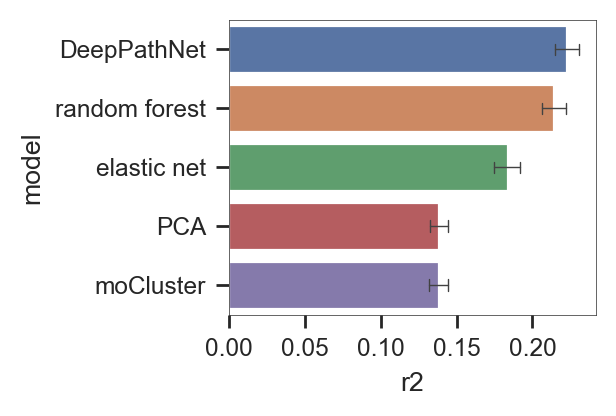

In [163]:
sns.barplot(x='r2',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_r2_drug.pdf", dpi=500)

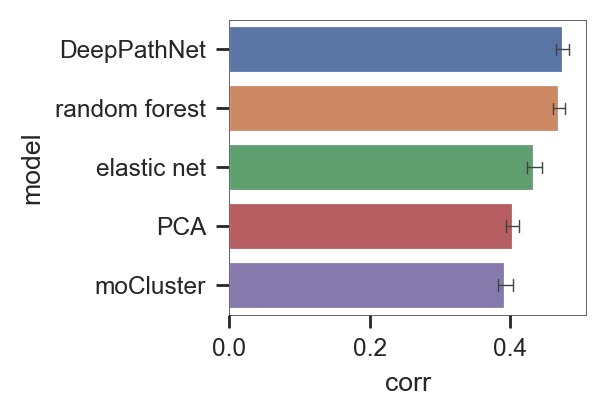

In [164]:
sns.barplot(x='corr',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_corr_drug.pdf", dpi=500)

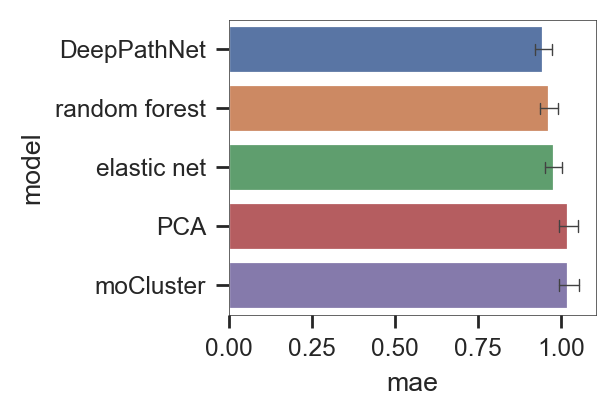

In [165]:
sns.barplot(x='mae',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_mae_drug.pdf", dpi=500)

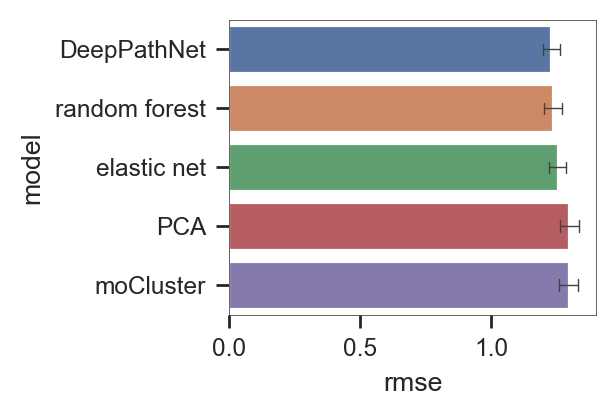

In [166]:
sns.barplot(x='rmse',
                y='model',
                data=commbined_df,
                palette=model_palette,
                capsize=0.2,
                errwidth=0.5,
                dodge=False)
plt.tight_layout()
plt.savefig("../../plots/sanger_gdsc_rmse_drug.pdf", dpi=500)

## no group

In [110]:
en_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_en/mutation_cnv_rna/scores_202107110149_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna['model'] = 'elastic net'

In [111]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_rf/mutation_cnv_rna/scores_202107101239_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna['model'] = 'random forest'

In [112]:
mixomics_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/mixOmics/sanger_mutation_cnv_rna_gdsc_50_comp.csv"
)
mixomics_mutation_cnv_rna[
    'model'] = 'mixOmics'

In [113]:
pca_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/pca_rf/mutation_cnv_rna/scores_202107121818_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna[
    'model'] = 'PCA'

In [114]:
moCluster_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/moCluster_rf/mutation_cnv_rna/scores_202107121932_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna['model'] = 'moCluster'

In [115]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/DeepMultiOmicNet/mutation_cnv_rna/scores_202107081045_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).max()['r2'].reset_index().drop(['drug_id', 'run'],
                                                           axis=1),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).min()['mae'].reset_index().drop(['drug_id', 'run'],
                                                            axis=1),
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).min()['rmse'].reset_index().drop(
                                     ['drug_id', 'run'], axis=1)
]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [116]:
show_grid(dl_mutation_cnv_rna.groupby(['drug_id', 'run']).max()['r2'].reset_index())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [117]:
cols = metrics + ['model']

In [118]:
commbined_df = pd.concat([
    dl_merged[cols],  rf_mutation_cnv_rna[cols], en_mutation_cnv_rna[cols],
    pca_mutation_cnv_rna[cols], moCluster_mutation_cnv_rna[cols], mixomics_mutation_cnv_rna[cols]
])

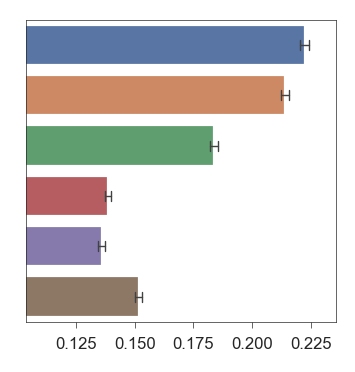

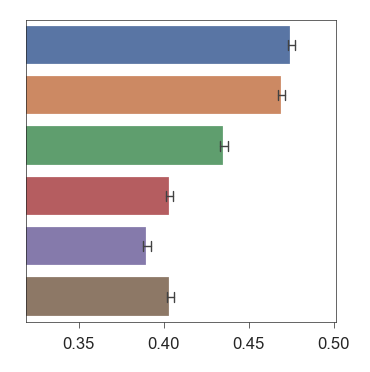

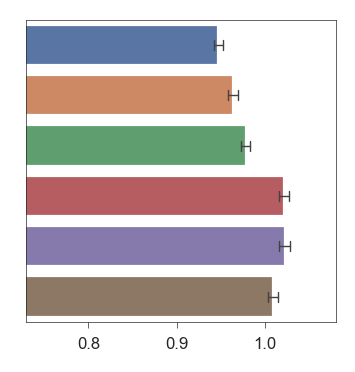

In [119]:
for m in metrics:
    plt.figure(figsize=(2,2))
    g = sns.barplot(x=m,
                    y='model',
                    data=commbined_df,
                    palette=model_palette,
                    capsize=0.2,
                    errwidth=0.5,
                    dodge=False)

    for axis in ['top', 'bottom', 'left', 'right']:
        g.spines[axis].set_linewidth(0.25)
    g.tick_params(direction='out', length=2, width=0.25)
    plt.xlim(left=commbined_df.groupby('model').median()[m].min() * 0.8)
    
    plt.ylabel("")
    plt.yticks([])
    plt.xlabel("")
#     plt.tight_layout()
#     plt.show()

    plt.savefig(f"../../plots/sanger_gdsc_{m}_nogroup.pdf", dpi=500)

In [45]:
tmp_df = pd.merge(dl_merged,
                  rf_mutation_cnv_rna,
                  on=['drug_id', 'run'],
                  suffixes=['_dl', '_rf'])

In [49]:
print(ttest_rel(tmp_df['corr_dl'],tmp_df['corr_rf']))
print(ttest_rel(tmp_df['r2_dl'],tmp_df['r2_rf']))
print(ttest_rel(tmp_df['mae_dl'],tmp_df['mae_rf']))
print(ttest_rel(tmp_df['rmse_dl'],tmp_df['rmse_rf']))


Ttest_relResult(statistic=12.526226572916046, pvalue=8.421191063659501e-36)
Ttest_relResult(statistic=19.652973372439252, pvalue=7.963766443926727e-85)
Ttest_relResult(statistic=-45.297379637011154, pvalue=0.0)
Ttest_relResult(statistic=-17.093027319834874, pvalue=7.831803107616207e-65)


# Sanger CTD

In [50]:
en_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/ec_en/mutation_cnv_rna/scores_202107131309_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna['model'] = 'elastic net'

In [51]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/ec_rf/mutation_cnv_rna/scores_202107131442_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna['model'] = 'random forest'

In [52]:
mixomics_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/mixOmics/sanger_mutation_cnv_rna_ctd2_50_comp.csv"
)
mixomics_mutation_cnv_rna[
    'model'] = 'mixOmics'

In [53]:
pca_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/pca_rf/mutation_cnv_rna/scores_202107131920_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna[
    'model'] = 'PCA'

In [54]:
moCluster_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/moCluster_rf/mutation_cnv_rna/scores_202107131722_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna['model'] = 'moCluster'

In [55]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/DeepMultiOmicNet/mutation_cnv_rna/scores_202107142106_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).max()['r2'].reset_index().drop(['drug_id', 'run'],
                                                           axis=1),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).min()['mae'].reset_index().drop(['drug_id', 'run'],
                                                            axis=1),
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).min()['rmse'].reset_index().drop(
                                     ['drug_id', 'run'], axis=1)
]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [56]:
commbined_df = pd.concat([
    dl_merged[cols],  rf_mutation_cnv_rna[cols], en_mutation_cnv_rna[cols],
    pca_mutation_cnv_rna[cols], moCluster_mutation_cnv_rna[cols], mixomics_mutation_cnv_rna[cols]
])

In [ ]:
for m in metrics:
    plt.figure(figsize=(2,2))
    g = sns.barplot(x=m,
                    y='model',
                    data=commbined_df,
                    palette=model_palette,
                    capsize=0.2,
                    errwidth=0.5,
                    dodge=False)

    for axis in ['top', 'bottom', 'left', 'right']:
        g.spines[axis].set_linewidth(0.25)
    g.tick_params(direction='out', length=2, width=0.25)
    plt.xlim(left=commbined_df.groupby('model').median()[m].min() * 0.8)
    
    plt.ylabel("")
    plt.yticks([])
    plt.xlabel("")
#     plt.tight_layout()
#     plt.show()

    plt.savefig(f"../../plots/sanger_ctd2_{m}_nogroup.pdf", dpi=500)

In [64]:
tmp_df['mae_rf'].mean()

1.0411254238273813

In [57]:
tmp_df = pd.merge(dl_merged,
                  rf_mutation_cnv_rna,
                  on=['drug_id', 'run'],
                  suffixes=['_dl', '_rf'])

print(ttest_rel(tmp_df['corr_dl'],tmp_df['corr_rf']))
print(ttest_rel(tmp_df['r2_dl'],tmp_df['r2_rf']))
print(ttest_rel(tmp_df['mae_dl'],tmp_df['mae_rf']))
print(ttest_rel(tmp_df['rmse_dl'],tmp_df['rmse_rf']))


Ttest_relResult(statistic=55.43589646442977, pvalue=0.0)
Ttest_relResult(statistic=57.34070314111326, pvalue=0.0)
Ttest_relResult(statistic=-69.3323703055365, pvalue=0.0)
Ttest_relResult(statistic=-44.962462221863696, pvalue=0.0)


# CCLE GDSC

In [230]:
en_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/ec_en/mutation_cnv_rna/scores_202107141940_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna['model'] = 'elastic net'

In [231]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/ec_rf/mutation_cnv_rna/scores_202107141609_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna['model'] = 'random forest'

In [232]:
mixomics_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/mixOmics/ccle_mutation_cnv_rna_gdsc_50_comp.csv"
)
mixomics_mutation_cnv_rna[
    'model'] = 'mixOmics'

In [233]:
pca_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/pca_rf/mutation_cnv_rna/scores_202107191305_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna[
    'model'] = 'PCA'

In [234]:
moCluster_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/moCluster_rf/mutation_cnv_rna/scores_202107201057_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna['model'] = 'moCluster'

In [235]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/DeepMultiOmicNet/mutation_cnv_rna/scores_202107151206_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna.groupby(['drug_id', 'run']).max()['r2'].reset_index(),
    dl_mutation_cnv_rna.groupby(['drug_id', 'run']).min()['mae'].reset_index(),
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).min()['rmse'].reset_index()
]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [236]:
commbined_df = pd.concat([
    dl_merged[cols],  rf_mutation_cnv_rna[cols], en_mutation_cnv_rna[cols],
    pca_mutation_cnv_rna[cols], moCluster_mutation_cnv_rna[cols], mixomics_mutation_cnv_rna[cols]
])

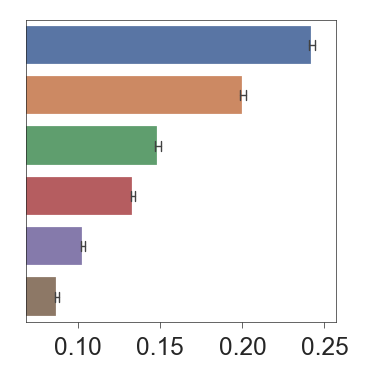

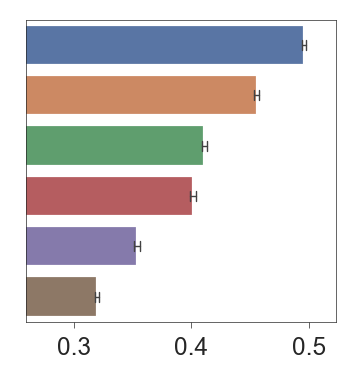

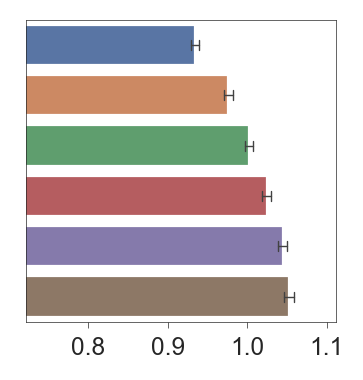

In [237]:
for m in metrics:
    plt.figure(figsize=(2,2))
    g = sns.barplot(x=m,
                    y='model',
                    data=commbined_df,
                    palette=model_palette,
                    capsize=0.2,
                    errwidth=0.5,
                    dodge=False)

    for axis in ['top', 'bottom', 'left', 'right']:
        g.spines[axis].set_linewidth(0.25)
    g.tick_params(direction='out', length=2, width=0.25)
    plt.xlim(left=commbined_df.groupby('model').median()[m].min() * 0.8)
    plt.ylabel("")
    plt.yticks([])
    plt.xlabel("")
#     plt.tight_layout()
#     plt.show()

    plt.savefig(f"../../plots/ccle_gdsc_{m}_nogroup.pdf", dpi=500)

# CCLE CTD2

In [238]:
en_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/ec_en/mutation_cnv_rna/scores_202107162105_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna['model'] = 'elastic net'

In [239]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/ec_rf/mutation_cnv_rna/scores_202107151725_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna['model'] = 'random forest'

In [120]:
mixomics_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/mixOmics/ccle_mutation_cnv_rna_ctd2_50_comp.csv"
)
mixomics_mutation_cnv_rna[
    'model'] = 'mixOmics'

In [241]:
pca_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/pca_rf/mutation_cnv_rna/scores_202107191307_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna[
    'model'] = 'PCA'

In [242]:
moCluster_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/moCluster_rf/mutation_cnv_rna/scores_202107201100_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna['model'] = 'moCluster'

In [243]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/DeepMultiOmicNet/mutation_cnv_rna/scores_202107151510_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna.groupby(['drug_id', 'run']).max()['r2'].reset_index(),
    dl_mutation_cnv_rna.groupby(['drug_id', 'run']).min()['mae'].reset_index(),
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).min()['rmse'].reset_index()
]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [244]:
commbined_df = pd.concat([
    dl_merged[cols],  rf_mutation_cnv_rna[cols], en_mutation_cnv_rna[cols],
    pca_mutation_cnv_rna[cols], moCluster_mutation_cnv_rna[cols], mixomics_mutation_cnv_rna[cols]
])

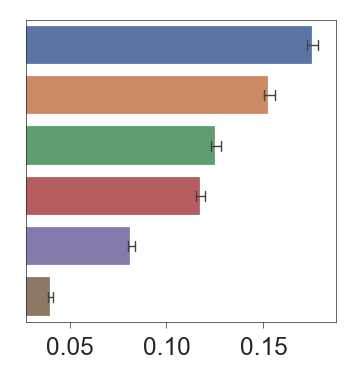

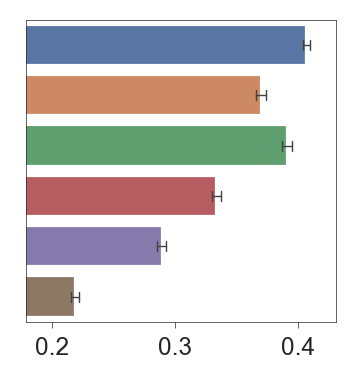

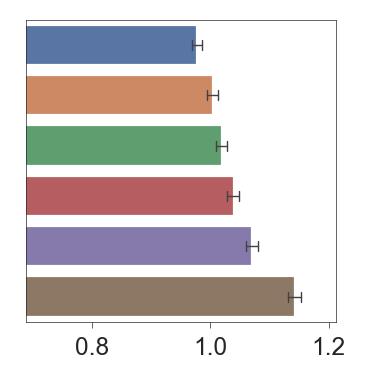

In [245]:
for m in metrics:
    plt.figure(figsize=(2,2))
    g = sns.barplot(x=m,
                    y='model',
                    data=commbined_df,
                    palette=model_palette,
                    capsize=0.2,
                    errwidth=0.5,
                    dodge=False)

    for axis in ['top', 'bottom', 'left', 'right']:
        g.spines[axis].set_linewidth(0.25)
    g.tick_params(direction='out', length=2, width=0.25)
    plt.xlim(left=commbined_df.groupby('model').median()[m].min() * 0.8)
    plt.ylabel("")
    plt.yticks([])
    plt.xlabel("")
#     plt.tight_layout()
#     plt.show()

    plt.savefig(f"../../plots/ccle_ctd2_{m}_nogroup.pdf", dpi=500)

# rank ploting

# DL vs RF

## load data

In [6]:
en_mutation_cnv_rna_sanger_gdsc = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_en/mutation_cnv_rna/scores_202107110149_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna_sanger_gdsc['model'] = 'elastic net'
en_mutation_cnv_rna_sanger_gdsc['data'] = 'Sanger+GDSC'

en_mutation_cnv_rna_sanger_ctd2 = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/ec_en/mutation_cnv_rna/scores_202107131309_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna_sanger_ctd2['model'] = 'elastic net'
en_mutation_cnv_rna_sanger_ctd2['data'] = 'Sanger+CTD2'

en_mutation_cnv_rna_ccle_gdsc = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/ec_en/mutation_cnv_rna/scores_202107141940_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna_ccle_gdsc['model'] = 'elastic net'
en_mutation_cnv_rna_ccle_gdsc['data'] = 'CCLE+GDSC'

en_mutation_cnv_rna_ccle_ctd2 = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/ec_en/mutation_cnv_rna/scores_202107162105_ec_en_lrp_drug_mutation_cnv_rna.csv"
)
en_mutation_cnv_rna_ccle_ctd2['model'] = 'elastic net'
en_mutation_cnv_rna_ccle_ctd2['data'] = 'CCLE+CTD2'

In [7]:
pca_mutation_cnv_rna_sanger_gdsc = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/pca_rf/mutation_cnv_rna/scores_202107121818_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna_sanger_gdsc['model'] = 'PCA'
pca_mutation_cnv_rna_sanger_gdsc['data'] = 'Sanger+GDSC'

pca_mutation_cnv_rna_sanger_ctd2 = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/pca_rf/mutation_cnv_rna/scores_202107131920_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna_sanger_ctd2['model'] = 'PCA'
pca_mutation_cnv_rna_sanger_ctd2['data'] = 'Sanger+CTD2'

pca_mutation_cnv_rna_ccle_gdsc = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/pca_rf/mutation_cnv_rna/scores_202107191305_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna_ccle_gdsc['model'] = 'PCA'
pca_mutation_cnv_rna_ccle_gdsc['data'] = 'CCLE+GDSC'

pca_mutation_cnv_rna_ccle_ctd2 = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/pca_rf/mutation_cnv_rna/scores_202107191307_pca_rf_lrp_drug_mutation_cnv_rna.csv"
)
pca_mutation_cnv_rna_ccle_ctd2['model'] = 'PCA'
pca_mutation_cnv_rna_ccle_ctd2['data'] = 'CCLE+CTD2'

In [8]:
moCluster_mutation_cnv_rna_sanger_gdsc = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/moCluster_rf/mutation_cnv_rna/scores_202107121932_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna_sanger_gdsc['model'] = 'moCluster'
moCluster_mutation_cnv_rna_sanger_gdsc['data'] = 'Sanger+GDSC'

moCluster_mutation_cnv_rna_sanger_ctd2 = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/moCluster_rf/mutation_cnv_rna/scores_202107131722_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna_sanger_ctd2['model'] = 'moCluster'
moCluster_mutation_cnv_rna_sanger_ctd2['data'] = 'Sanger+CTD2'

moCluster_mutation_cnv_rna_ccle_gdsc = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/moCluster_rf/mutation_cnv_rna/scores_202107201057_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna_ccle_gdsc['model'] = 'moCluster'
moCluster_mutation_cnv_rna_ccle_gdsc['data'] = 'CCLE+GDSC'

moCluster_mutation_cnv_rna_ccle_ctd2 = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/moCluster_rf/mutation_cnv_rna/scores_202107201100_moCluster_rf_lrp_drug_mutation_cnv_rna.csv"
)
moCluster_mutation_cnv_rna_ccle_ctd2['model'] = 'moCluster'
moCluster_mutation_cnv_rna_ccle_ctd2['data'] = 'CCLE+CTD2'

In [9]:
mixOmics_mutation_cnv_rna_sanger_gdsc = pd.read_csv(
    f"../../work_dirs/mixOmics/sanger_mutation_cnv_rna_gdsc.csv"
)
mixOmics_mutation_cnv_rna_sanger_gdsc['model'] = 'mixOmics'
mixOmics_mutation_cnv_rna_sanger_gdsc['data'] = 'Sanger+GDSC'

mixOmics_mutation_cnv_rna_sanger_ctd2 = pd.read_csv(
    f"../../work_dirs/mixOmics/sanger_mutation_cnv_rna_ctd2_50_comp.csv"
)
mixOmics_mutation_cnv_rna_sanger_ctd2['model'] = 'mixOmics'
mixOmics_mutation_cnv_rna_sanger_ctd2['data'] = 'Sanger+CTD2'

mixOmics_mutation_cnv_rna_ccle_gdsc = pd.read_csv(
    f"../../work_dirs/mixOmics/ccle_mutation_cnv_rna_gdsc_50_comp.csv"
)
mixOmics_mutation_cnv_rna_ccle_gdsc['model'] = 'mixOmics'
mixOmics_mutation_cnv_rna_ccle_gdsc['data'] = 'CCLE+GDSC'

mixOmics_mutation_cnv_rna_ccle_ctd2 = pd.read_csv(
    f"../../work_dirs/mixOmics/ccle_mutation_cnv_rna_ctd2_50_comp.csv"
)
mixOmics_mutation_cnv_rna_ccle_ctd2['model'] = 'mixOmics'
mixOmics_mutation_cnv_rna_ccle_ctd2['data'] = 'CCLE+CTD2'

In [10]:
rf_mutation_cnv_rna_sanger_gdsc = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/ec_rf/mutation_cnv_rna/scores_202107101239_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna_sanger_gdsc['model'] = 'random forest'
rf_mutation_cnv_rna_sanger_gdsc['data'] = 'Sanger+GDSC'

rf_mutation_cnv_rna_sanger_ctd2 = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/ec_rf/mutation_cnv_rna/scores_202107131442_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna_sanger_ctd2['model'] = 'random forest'
rf_mutation_cnv_rna_sanger_ctd2['data'] = 'Sanger+CTD2'

rf_mutation_cnv_rna_ccle_gdsc = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/ec_rf/mutation_cnv_rna/scores_202107141609_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna_ccle_gdsc['model'] = 'random forest'
rf_mutation_cnv_rna_ccle_gdsc['data'] = 'CCLE+GDSC'

rf_mutation_cnv_rna_ccle_ctd2 = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/ec_rf/mutation_cnv_rna/scores_202107151725_ec_rf_lrp_drug_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna_ccle_ctd2['model'] = 'random forest'
rf_mutation_cnv_rna_ccle_ctd2['data'] = 'CCLE+CTD2'

In [11]:
dl_mutation_cnv_rna_sanger_gdsc = pd.read_csv(
    f"../../work_dirs/sanger_gdsc_intersection_noprot/DeepMultiOmicNet/mutation_cnv_rna/scores_202107081045_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna_sanger_gdsc.groupby(['drug_id', 'run'
                                             ]).max()['corr'].reset_index(),
    dl_mutation_cnv_rna_sanger_gdsc.groupby(['drug_id',
                                             'run']).max()['r2'].reset_index(),
    dl_mutation_cnv_rna_sanger_gdsc.groupby(['drug_id', 'run'
                                             ]).min()['mae'].reset_index(),
    dl_mutation_cnv_rna_sanger_gdsc.groupby(['drug_id', 'run'
                                             ]).min()['rmse'].reset_index()
]
dl_merged_sanger_gdsc = pd.concat(dl_list, axis=1)
dl_merged_sanger_gdsc = dl_merged_sanger_gdsc.loc[:, ~dl_merged_sanger_gdsc.
                                                  columns.duplicated()]
dl_merged_sanger_gdsc['model'] = 'DeePathNet'
dl_merged_sanger_gdsc['data'] = 'Sanger+GDSC'

dl_mutation_cnv_rna_sanger_ctd2 = pd.read_csv(
    f"../../work_dirs/sanger_ctd2/DeepMultiOmicNet/mutation_cnv_rna/scores_202107142106_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna_sanger_ctd2.groupby(['drug_id', 'run'
                                             ]).max()['corr'].reset_index(),
    dl_mutation_cnv_rna_sanger_ctd2.groupby(['drug_id',
                                             'run']).max()['r2'].reset_index(),
    dl_mutation_cnv_rna_sanger_ctd2.groupby(['drug_id', 'run'
                                             ]).min()['mae'].reset_index(),
    dl_mutation_cnv_rna_sanger_ctd2.groupby(['drug_id', 'run'
                                             ]).min()['rmse'].reset_index()
]
dl_merged_sanger_ctd2 = pd.concat(dl_list, axis=1)
dl_merged_sanger_ctd2 = dl_merged_sanger_ctd2.loc[:, ~dl_merged_sanger_ctd2.
                                                  columns.duplicated()]
dl_merged_sanger_ctd2['model'] = 'DeePathNet'
dl_merged_sanger_ctd2['data'] = 'Sanger+CTD2'

In [12]:
dl_mutation_cnv_rna_ccle_gdsc = pd.read_csv(
    f"../../work_dirs/ccle_gdsc_intersection3/DeepMultiOmicNet/mutation_cnv_rna/scores_202107151206_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna_ccle_gdsc.groupby(['drug_id',
                                           'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna_ccle_gdsc.groupby(['drug_id',
                                           'run']).max()['r2'].reset_index(),
    dl_mutation_cnv_rna_ccle_gdsc.groupby(['drug_id',
                                           'run']).min()['mae'].reset_index(),
    dl_mutation_cnv_rna_ccle_gdsc.groupby(['drug_id',
                                           'run']).min()['rmse'].reset_index()
]
dl_merged_ccle_gdsc = pd.concat(dl_list, axis=1)
dl_merged_ccle_gdsc = dl_merged_ccle_gdsc.loc[:, ~dl_merged_ccle_gdsc.columns.
                                              duplicated()]
dl_merged_ccle_gdsc['model'] = 'DeePathNet'
dl_merged_ccle_gdsc['data'] = 'CCLE+GDSC'

dl_mutation_cnv_rna_ccle_ctd2 = pd.read_csv(
    f"../../work_dirs/ccle_ctd2/DeepMultiOmicNet/mutation_cnv_rna/scores_202107151510_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna_ccle_ctd2.groupby(['drug_id',
                                           'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna_ccle_ctd2.groupby(['drug_id',
                                           'run']).max()['r2'].reset_index(),
    dl_mutation_cnv_rna_ccle_ctd2.groupby(['drug_id',
                                           'run']).min()['mae'].reset_index(),
    dl_mutation_cnv_rna_ccle_ctd2.groupby(['drug_id',
                                           'run']).min()['rmse'].reset_index()
]
dl_merged_ccle_ctd2 = pd.concat(dl_list, axis=1)
dl_merged_ccle_ctd2 = dl_merged_ccle_ctd2.loc[:, ~dl_merged_ccle_ctd2.columns.
                                              duplicated()]

dl_merged_ccle_ctd2['model'] = 'DeePathNet'
dl_merged_ccle_ctd2['data'] = 'CCLE+CTD2'

In [13]:
cols = metrics + ['model', 'data', 'run', 'drug_id']

In [14]:
df_merged = pd.concat([
    dl_merged_sanger_gdsc[cols],
    dl_merged_sanger_ctd2[cols],
    dl_merged_ccle_gdsc[cols],
    dl_merged_ccle_ctd2[cols],
    rf_mutation_cnv_rna_sanger_gdsc[cols],
    rf_mutation_cnv_rna_sanger_ctd2[cols],
    rf_mutation_cnv_rna_ccle_gdsc[cols],
    rf_mutation_cnv_rna_ccle_ctd2[cols],
    en_mutation_cnv_rna_sanger_gdsc[cols],
    en_mutation_cnv_rna_sanger_ctd2[cols],
    en_mutation_cnv_rna_ccle_gdsc[cols],
    en_mutation_cnv_rna_ccle_ctd2[cols],
    pca_mutation_cnv_rna_sanger_gdsc[cols],
    pca_mutation_cnv_rna_sanger_ctd2[cols],
    pca_mutation_cnv_rna_ccle_gdsc[cols],
    pca_mutation_cnv_rna_ccle_ctd2[cols],
    moCluster_mutation_cnv_rna_sanger_gdsc[cols],
    moCluster_mutation_cnv_rna_sanger_ctd2[cols],
    moCluster_mutation_cnv_rna_ccle_gdsc[cols],
    moCluster_mutation_cnv_rna_ccle_ctd2[cols],
    mixOmics_mutation_cnv_rna_sanger_gdsc[cols],
    mixOmics_mutation_cnv_rna_sanger_ctd2[cols],
    mixOmics_mutation_cnv_rna_ccle_gdsc[cols],
    mixOmics_mutation_cnv_rna_ccle_ctd2[cols],
])

In [15]:
df_merged.to_csv("../../results/all_drug_results.csv", index=False)

## analysis

In [74]:
df_merged_mean = df_merged.groupby(['data','model']).mean()

In [75]:
df_merged_mean.reset_index()

,data,model,r2,corr,mae
0,CCLE+CTD2,DeepPathNet,0.175443,0.406490,0.977120
1,CCLE+CTD2,PCA,0.117634,0.333451,1.039073
2,CCLE+CTD2,elastic net,0.125457,0.390815,1.019555
3,CCLE+CTD2,mixOmics,0.040321,0.218442,1.142899
4,CCLE+CTD2,moCluster,0.081830,0.288903,1.070741
5,CCLE+CTD2,random forest,0.153125,0.369305,1.003886
6,CCLE+GDSC,DeepPathNet,0.242486,0.496239,0.933615
7,CCLE+GDSC,PCA,0.133358,0.401486,1.024424
8,CCLE+GDSC,elastic net,0.148554,0.411086,1.002546
9,CCLE+GDSC,mixOmics,0.087136,0.319661,1.052510


In [76]:
ranks_df = pd.concat([
    df_merged_mean.reset_index().groupby(
        ['data'])[['r2', 'corr']].rank(ascending=True),
    df_merged_mean.reset_index().groupby(['data'])[['mae'
                                                       ]].rank(ascending=False)
],
                     axis=1)
ranks_df.columns = [f"{x}_rank" for x in ranks_df.columns]
ranks_df = pd.concat([df_merged_mean.reset_index()[['data', 'model']], ranks_df], axis=1)

In [78]:
ranks_df_long = pd.melt(ranks_df, id_vars=['data', 'model'], value_name='rank', var_name='metric')

In [79]:
ranks_df_long['xlabel'] = ranks_df_long['data'] + '_' + ranks_df_long['metric']

In [105]:
model_markers = {
    'DeePathNet': 'o',
    'random forest': 'o',
    'elastic net': 'o',
    'PCA': 'o',
    'moCluster': 'o',
    'mixOmics': 'o'
}

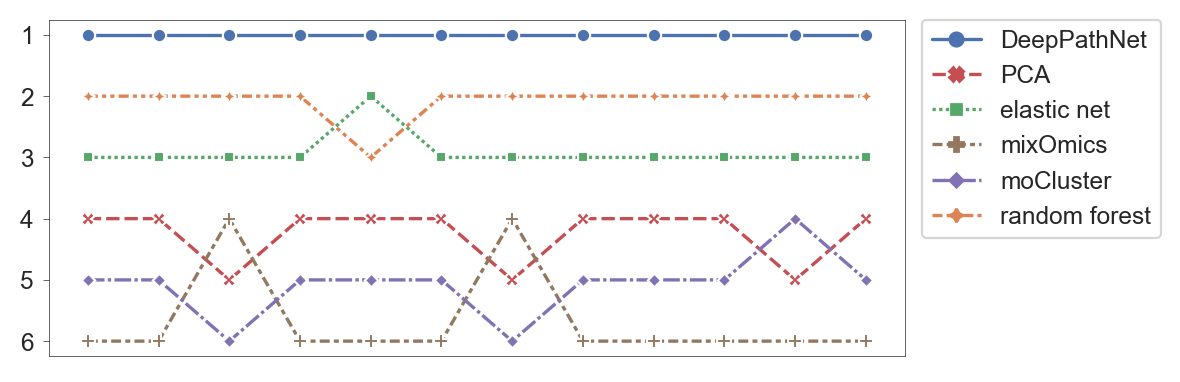

In [125]:
plt.figure(figsize=(6,2))
g = sns.lineplot(x='xlabel',
                 y='rank',
                 hue='model',
                 data=ranks_df_long,
                 palette=model_palette,
                 markers=True,
                 style='model')
for axis in ['top', 'bottom', 'left', 'right']:
    g.spines[axis].set_linewidth(0.25)
g.tick_params(direction='out', length=2, width=0.25)
plt.ylabel("")
ticks = [6,6,5,4,3,2,1]
g.set_yticklabels(ticks)
plt.xticks([])
plt.xlabel("")
# g.legend().remove()
plt.legend(bbox_to_anchor=(1.02, 1),
           loc=2,
           borderaxespad=0.)
plt.tight_layout()
plt.savefig("../../plots/drug_ranks.pdf", dpi=500)

# Validation

## sanger train ccle validate

In [20]:
metrics = ['r2', 'corr', 'mae']
cols = metrics + ['drug_id', 'model']

In [8]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_train_ccle_test_gdsc/ec_rf/mutation_cnv_rna/scores_202201031810_ec_rf_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna['model'] = 'random forest'

In [9]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/sanger_train_ccle_test_gdsc/DeePathNet/mutation_cnv_rna/scores_202201031957_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).max()['r2'].reset_index().drop(['drug_id', 'run'],
                                                           axis=1),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).min()['mae'].reset_index().drop(['drug_id', 'run'],
                                                            axis=1),
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).min()['rmse'].reset_index().drop(
                                     ['drug_id', 'run'], axis=1)
]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [21]:
commbined_df = pd.concat([dl_merged[cols], rf_mutation_cnv_rna[cols]])

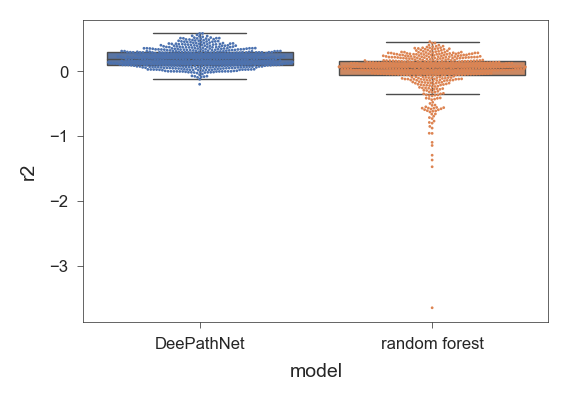

In [30]:
sns.boxplot(x='model',
            y='r2',
            data=commbined_df,
            showfliers=False,
            linewidth=0.5)
sns.swarmplot(x='model', y='r2', data=commbined_df, size=1)

In [42]:
commbined_df_melt = pd.melt(commbined_df,
                            id_vars=['drug_id', 'model'],
                            value_vars=['r2', 'corr', 'mae'],
                            var_name='metrics',
                            value_name='performance')

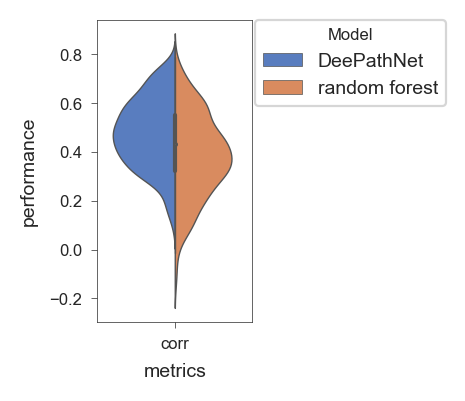

In [56]:
plt.figure(figsize=(1,2))
sns.violinplot(y='performance',
               hue='model',
               x='metrics',
               palette="muted",
               split=True,
               linewidth=0.5,
               data=commbined_df_melt[commbined_df_melt['metrics'] == 'corr'])
plt.legend(bbox_to_anchor=(1.02, 1),
           fontsize=7,
           loc=2,
           borderaxespad=0.,
           title='Model',
           title_fontsize=6)

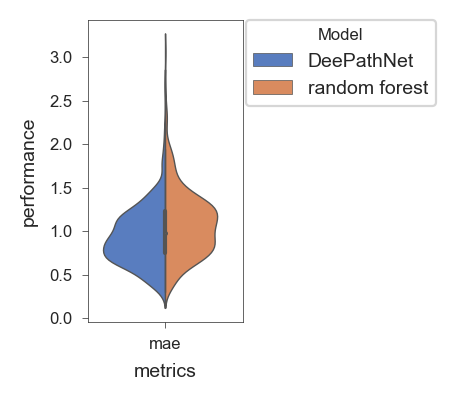

In [57]:
plt.figure(figsize=(1,2))
sns.violinplot(y='performance',
               hue='model',
               x='metrics',
               palette="muted",
               split=True,
               linewidth=0.5,
               data=commbined_df_melt[commbined_df_melt['metrics'] == 'mae'])
plt.legend(bbox_to_anchor=(1.02, 1),
           fontsize=7,
           loc=2,
           borderaxespad=0.,
           title='Model',
           title_fontsize=6)

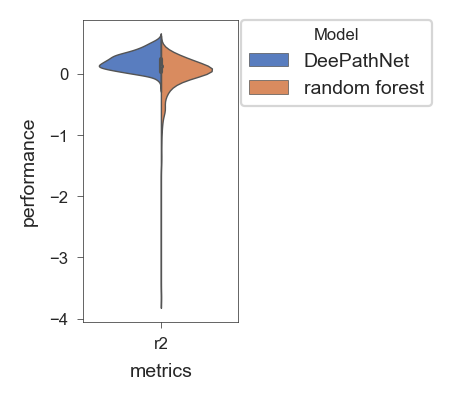

In [58]:
plt.figure(figsize=(1,2))
sns.violinplot(y='performance',
               hue='model',
               x='metrics',
               palette="muted",
               split=True,
               linewidth=0.5,
               data=commbined_df_melt[commbined_df_melt['metrics']=='r2'])
plt.legend(bbox_to_anchor=(1.02, 1),
           fontsize=7,
           loc=2,
           borderaxespad=0.,
           title='Model',
           title_fontsize=6)

In [72]:
diff_df = pd.DataFrame(dl_merged[metrics] - rf_mutation_cnv_rna[metrics])

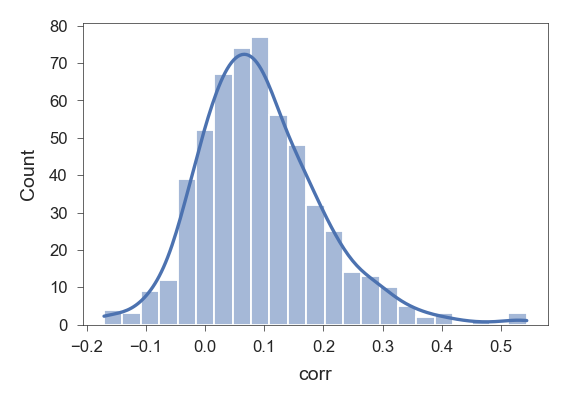

In [85]:
sns.histplot(diff_df['corr'], kde=True)

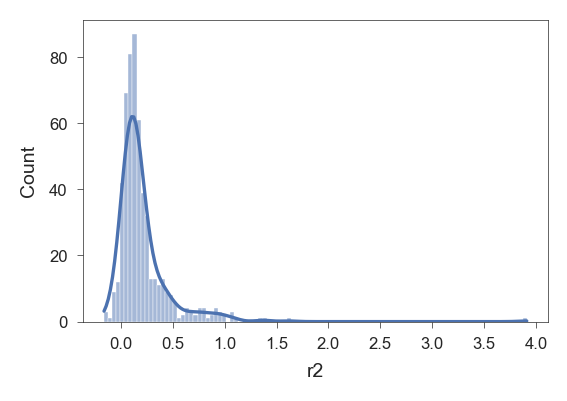

In [86]:
sns.histplot(diff_df['r2'], kde=True)

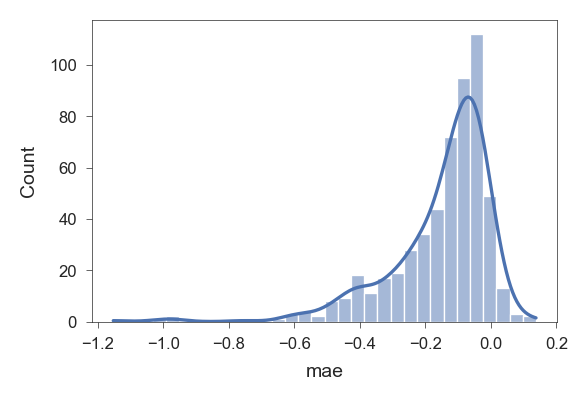

In [87]:
sns.histplot(diff_df['mae'], kde=True)

## ccle train sanger test

In [20]:
metrics = ['r2', 'corr', 'mae']
cols = metrics + ['drug_id', 'model']

In [89]:
rf_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_train_sanger_test_ctd/ec_rf/mutation_cnv_rna/scores_202201040229_ec_rf_mutation_cnv_rna.csv"
)
rf_mutation_cnv_rna['model'] = 'random forest'

In [90]:
dl_mutation_cnv_rna = pd.read_csv(
    f"../../work_dirs/ccle_train_sanger_test_ctd/DeePathNet/mutation_cnv_rna/scores_202201040155_DOIT_LRP.csv.gz"
)

dl_list = [
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).max()['corr'].reset_index(),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).max()['r2'].reset_index().drop(['drug_id', 'run'],
                                                           axis=1),
    dl_mutation_cnv_rna.groupby(
        ['drug_id', 'run']).min()['mae'].reset_index().drop(['drug_id', 'run'],
                                                            axis=1),
    dl_mutation_cnv_rna.groupby(['drug_id',
                                 'run']).min()['rmse'].reset_index().drop(
                                     ['drug_id', 'run'], axis=1)
]
dl_merged = pd.concat(dl_list, axis=1)
dl_merged['model'] = 'DeePathNet'

In [91]:
commbined_df = pd.concat([dl_merged[cols], rf_mutation_cnv_rna[cols]])

In [93]:
commbined_df_melt = pd.melt(commbined_df,
                            id_vars=['drug_id', 'model'],
                            value_vars=['r2', 'corr', 'mae'],
                            var_name='metrics',
                            value_name='performance')

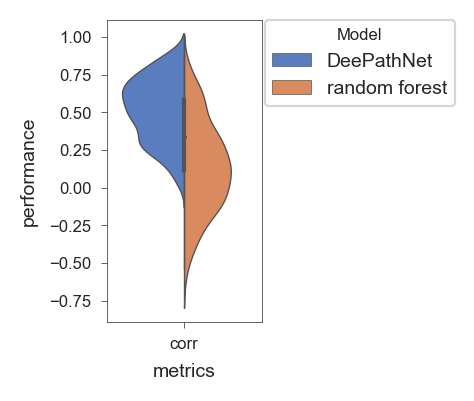

In [94]:
plt.figure(figsize=(1,2))
sns.violinplot(y='performance',
               hue='model',
               x='metrics',
               palette="muted",
               split=True,
               linewidth=0.5,
               data=commbined_df_melt[commbined_df_melt['metrics'] == 'corr'])
plt.legend(bbox_to_anchor=(1.02, 1),
           fontsize=7,
           loc=2,
           borderaxespad=0.,
           title='Model',
           title_fontsize=6)

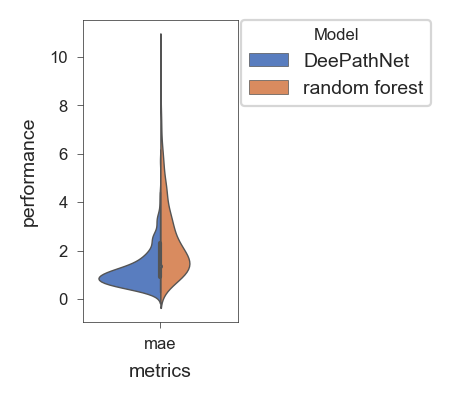

In [95]:
plt.figure(figsize=(1,2))
sns.violinplot(y='performance',
               hue='model',
               x='metrics',
               palette="muted",
               split=True,
               linewidth=0.5,
               data=commbined_df_melt[commbined_df_melt['metrics'] == 'mae'])
plt.legend(bbox_to_anchor=(1.02, 1),
           fontsize=7,
           loc=2,
           borderaxespad=0.,
           title='Model',
           title_fontsize=6)

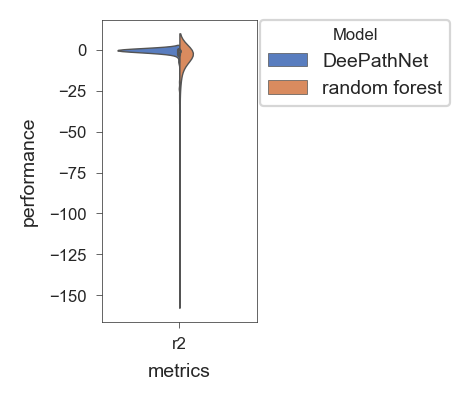

In [96]:
plt.figure(figsize=(1,2))
sns.violinplot(y='performance',
               hue='model',
               x='metrics',
               palette="muted",
               split=True,
               linewidth=0.5,
               data=commbined_df_melt[commbined_df_melt['metrics']=='r2'])
plt.legend(bbox_to_anchor=(1.02, 1),
           fontsize=7,
           loc=2,
           borderaxespad=0.,
           title='Model',
           title_fontsize=6)

In [97]:
diff_df = pd.DataFrame(dl_merged[metrics] - rf_mutation_cnv_rna[metrics])

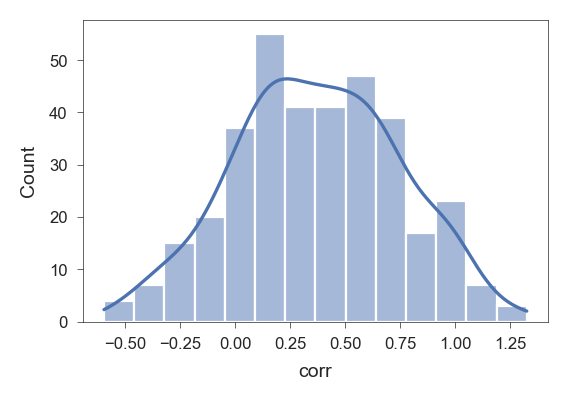

In [98]:
sns.histplot(diff_df['corr'], kde=True)

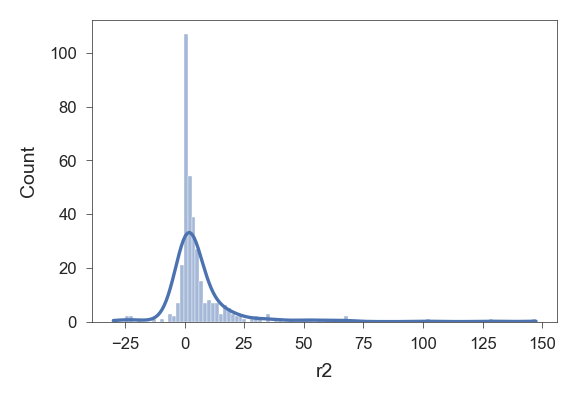

In [99]:
sns.histplot(diff_df['r2'], kde=True)

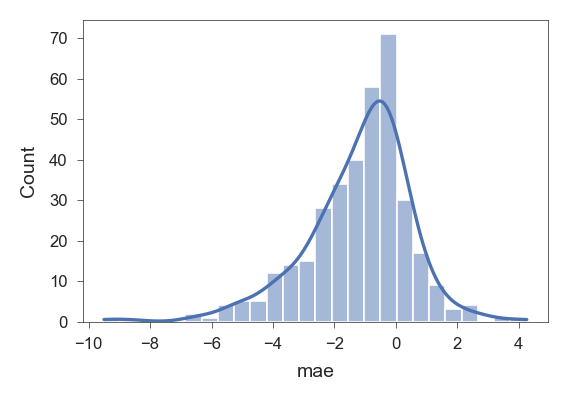

In [100]:
sns.histplot(diff_df['mae'], kde=True)